# **Diabetes Prediction using Logistic Regression and K-Nearest Neighbor**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!pip install pyspark

Mounted at /content/drive
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 20.1 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=49199928d077ba091478ff250d131438dc82ddf89c0fc2c36d79d068cb54fa20
  Stored in directory: /root/.cache/pip/wheels/43/dc/11/ec201cd671da62fa9c5cc77078235e40722170ceba231d7598
Successfully built pyspark


In [ ]:
import numpy as np
import pandas as pd
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
                                                #################Creating SPARK Session############
spark = SparkSession.builder\
        .master("local[*]")\
        .appName('PySpark_Tutorial')\
        .getOrCreate()

## **Data Analysis using Pyspark**

In [ ]:
file_path = '/content/drive/MyDrive/diabetes.csv'      ## Add a .csv file path

df = spark.read.csv(file_path,header=True,inferSchema=True)
df.show(10)

+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|          6|    148|           72|           35|      0|33.6|                   0.627| 50|      1|
|          1|     85|           66|           29|      0|26.6|                   0.351| 31|      0|
|          8|    183|           64|            0|      0|23.3|                   0.672| 32|      1|
|          1|     89|           66|           23|     94|28.1|                   0.167| 21|      0|
|          0|    137|           40|           35|    168|43.1|                   2.288| 33|      1|
|          5|    116|           74|            0|      0|25.6|                   0.201| 30|      0|
|          3|     78|           50|           32|     88|31.0|                   0.248| 26|      1|


In [ ]:
                                                #################Displaying Data Types############
df.printSchema()

root
 |-- Pregnancies: integer (nullable = true)
 |-- Glucose: integer (nullable = true)
 |-- BloodPressure: integer (nullable = true)
 |-- SkinThickness: integer (nullable = true)
 |-- Insulin: integer (nullable = true)
 |-- BMI: double (nullable = true)
 |-- DiabetesPedigreeFunction: double (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Outcome: integer (nullable = true)



In [ ]:
                                                #################Displaying Data Statistics############
df.describe().show()

+-------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------------+------------------+------------------+
|summary|       Pregnancies|          Glucose|     BloodPressure|     SkinThickness|           Insulin|               BMI|DiabetesPedigreeFunction|               Age|           Outcome|
+-------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------------+------------------+------------------+
|  count|               768|              768|               768|               768|               768|               768|                     768|               768|               768|
|   mean|3.8450520833333335|     120.89453125|       69.10546875|20.536458333333332| 79.79947916666667|31.992578124999977|      0.4718763020833327|33.240885416666664|0.3489583333333333|
| stddev|  3.36957806269887|31.97261819513622|19.355807170644777|15.95

In [ ]:
# Calculate the frequency of each value in the Outcome column
outcome_counts = df.groupBy('Outcome').count()

# Calculate the percentage of each value in the Outcome column
total_count = df.count()
outcome_percentages = outcome_counts.withColumn('percentage', outcome_counts['count'] / total_count * 100)

# Display the resulting DataFrame
outcome_percentages.show()

+-------+-----+-----------------+
|Outcome|count|       percentage|
+-------+-----+-----------------+
|      1|  268|34.89583333333333|
|      0|  500|65.10416666666666|
+-------+-----+-----------------+



In [ ]:
#showing the average and max of Pregnancies values w.r.t Outcome
from pyspark.sql.functions import mean

df.groupBy("Outcome").mean("Pregnancies").show()

+-------+-----------------+
|Outcome| avg(Pregnancies)|
+-------+-----------------+
|      1|4.865671641791045|
|      0|            3.298|
+-------+-----------------+



In [ ]:
#showing the average and max of Age values w.r.t Outcome

df.groupBy("Outcome").mean("Age").show()
df.groupBy("Outcome").max("Age").show()

+-------+-----------------+
|Outcome|         avg(Age)|
+-------+-----------------+
|      1|37.06716417910448|
|      0|            31.19|
+-------+-----------------+

+-------+--------+
|Outcome|max(Age)|
+-------+--------+
|      1|      70|
|      0|      81|
+-------+--------+



In [ ]:
#showing the average and max of Insulin values w.r.t Outcome

df.groupBy("Outcome").mean("Insulin").show()
df.groupBy("Outcome").max("Insulin").show()

+-------+------------------+
|Outcome|      avg(Insulin)|
+-------+------------------+
|      1|100.33582089552239|
|      0|            68.792|
+-------+------------------+

+-------+------------+
|Outcome|max(Insulin)|
+-------+------------+
|      1|         846|
|      0|         744|
+-------+------------+



In [ ]:
#showing the average and max of Glucose amount w.r.t Outcome

df.groupBy("Outcome").mean("Glucose").show()
df.groupBy("Outcome").max("Glucose").show()

+-------+------------------+
|Outcome|      avg(Glucose)|
+-------+------------------+
|      1|141.25746268656715|
|      0|            109.98|
+-------+------------------+

+-------+------------+
|Outcome|max(Glucose)|
+-------+------------+
|      1|         199|
|      0|         197|
+-------+------------+



In [ ]:
#showing the average and max of BMI values w.r.t Outcome

df.groupBy("Outcome").mean("BMI").show()
df.groupBy("Outcome").max("BMI").show()

+-------+-----------------+
|Outcome|         avg(BMI)|
+-------+-----------------+
|      1|35.14253731343278|
|      0|30.30419999999996|
+-------+-----------------+

+-------+--------+
|Outcome|max(BMI)|
+-------+--------+
|      1|    67.1|
|      0|    57.3|
+-------+--------+



##**Data Visualization using Pandas**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


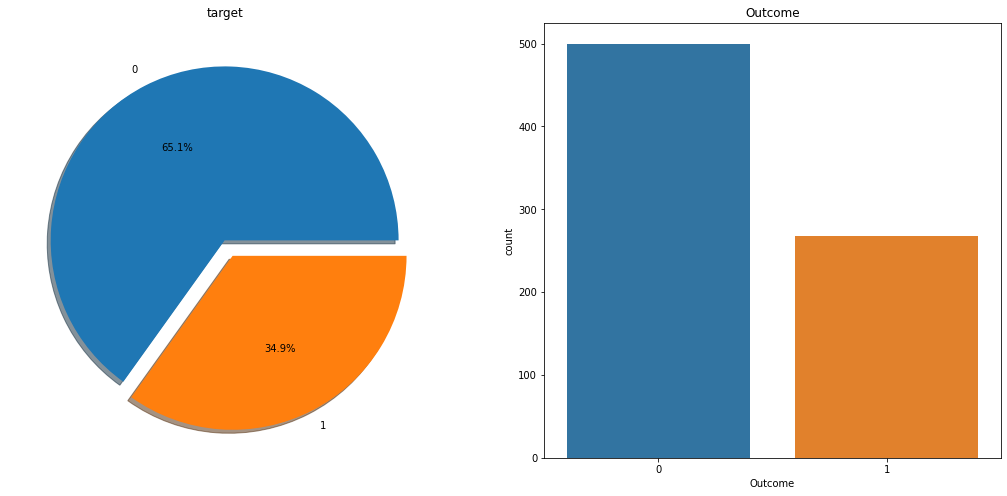

In [ ]:
                                       #############Visualizing the Outcome variable############

p_df= df.toPandas()
f,ax=plt.subplots(1,2,figsize=(18,8))
p_df['Outcome'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('target')
ax[0].set_ylabel('')
sns.countplot('Outcome',data=p_df,ax=ax[1])
ax[1].set_title('Outcome')
plt.show()

In [ ]:
                                    ################Calculating Correlation matrix of the data set########
p_df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


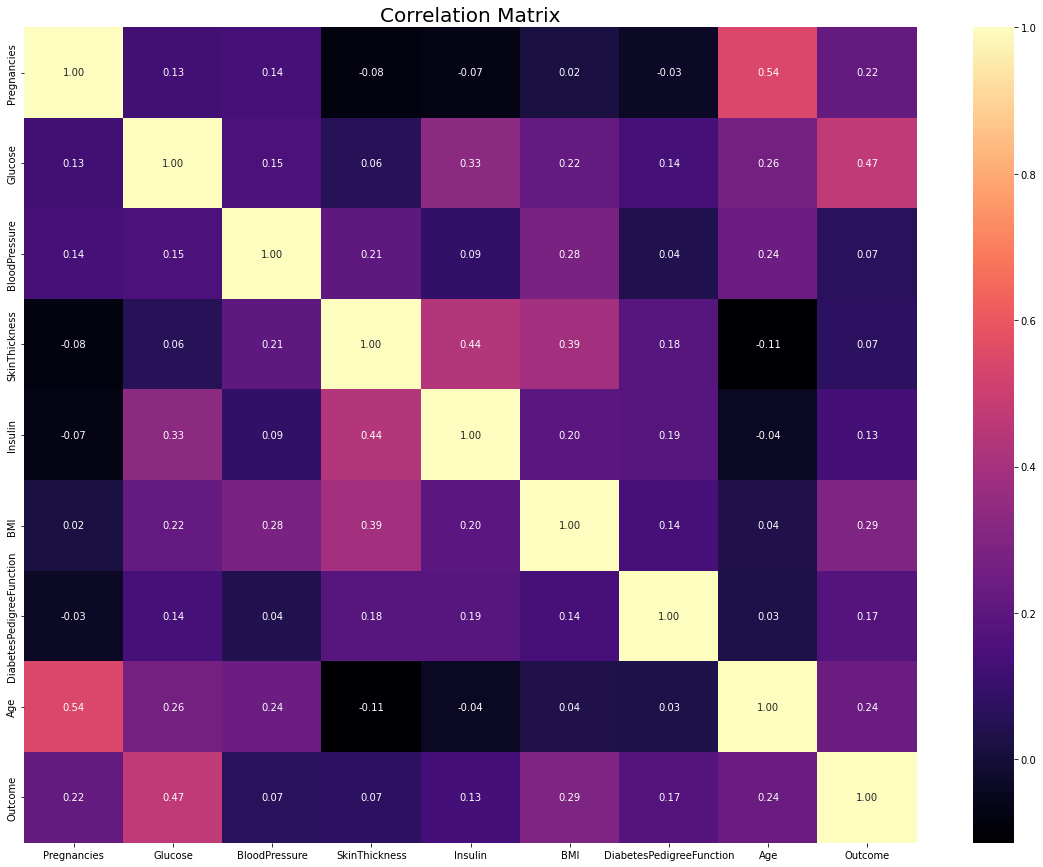

In [ ]:
                            ####################Correlation matrix graph of the data set########

f, ax = plt.subplots(figsize= [20,15])
sns.heatmap(p_df.corr(), annot=True, fmt=".2f", ax=ax, cmap = "magma" )
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

##**Data Preprocessing**



### Missing Input Values

In [ ]:
                             ###############################Showing zeero values in each variable###################
from pyspark.sql.functions import  when, col, count

zeros_count_df = df.select([count(when(col(column_name) == 0, column_name)).alias(column_name) for column_name in df.columns])
zeros_count_df.show()


+-----------+-------+-------------+-------------+-------+---+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin|BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+-------------+-------+---+------------------------+---+-------+
|        111|      5|           35|          227|    374| 11|                       0|  0|    500|
+-----------+-------+-------------+-------------+-------+---+------------------------+---+-------+



In [ ]:
                          ##################Replacing zero values of the dataframe by their respective column's median value#############
from pyspark.sql.functions import when, percentile_approx

for column_name in df.columns:
    median_value = df.select(percentile_approx(col(column_name), 0.5).alias("median")).collect()[0]["median"]
    df = df.withColumn(column_name, when(col(column_name) == 0, median_value).otherwise(col(column_name)))

df.show(5)

+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|          6|    148|           72|           35|     29|33.6|                   0.627| 50|      1|
|          1|     85|           66|           29|     29|26.6|                   0.351| 31|      0|
|          8|    183|           64|           23|     29|23.3|                   0.672| 32|      1|
|          1|     89|           66|           23|     94|28.1|                   0.167| 21|      0|
|          3|    137|           40|           35|    168|43.1|                   2.288| 33|      1|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
only showing top 5 rows



### Filtering the Outliers

In [ ]:
for feature in p_df:
    Q1 = p_df[feature].quantile(0.25)
    Q3 = p_df[feature].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1- 1.5*IQR
    upper = Q3 + 1.5*IQR

    if p_df[(p_df[feature] > upper)].any(axis=None):
        print(feature,"yes")
    else:
        print(feature, "no")

Pregnancies yes
Glucose no
BloodPressure yes
SkinThickness yes
Insulin yes
BMI yes
DiabetesPedigreeFunction yes
Age yes
Outcome no


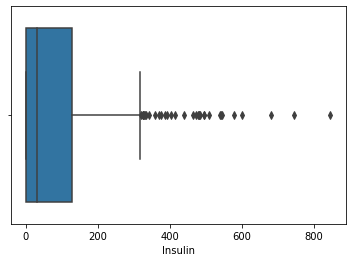

In [ ]:
                                ################Visualizing the otliers of Insulin variable with boxplot method##############
import seaborn as sns

sns.boxplot(x = p_df["Insulin"]);

In [ ]:
                                         #####################Suppressing the outliers#################

Q1 = p_df.Insulin.quantile(0.25)
Q3 = p_df.Insulin.quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
p_df.loc[p_df["Insulin"] > upper,"Insulin"] = upper

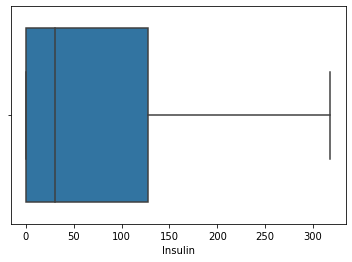

In [ ]:
import seaborn as sns
sns.boxplot(x = p_df["Insulin"]);

###Local Outlier Factor (LOF)

In [ ]:
from sklearn.neighbors import LocalOutlierFactor

lof =LocalOutlierFactor(n_neighbors= 10)
lof.fit_predict(p_df)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [ ]:
p_df_scores = lof.negative_outlier_factor_
np.sort(p_df_scores)[0:30]

array([-2.28758733, -2.10500141, -2.05369597, -2.02885837, -2.00720763,
       -1.98655427, -1.95338702, -1.91601291, -1.88815728, -1.8134966 ,
       -1.80857804, -1.74187579, -1.73154315, -1.71639102, -1.71372358,
       -1.67587303, -1.64102097, -1.63498158, -1.62215678, -1.61146741,
       -1.59344933, -1.54582494, -1.54285259, -1.51413703, -1.50984155,
       -1.49974262, -1.48877158, -1.48495018, -1.47518401, -1.47089   ])

In [ ]:
threshold = np.sort(p_df_scores)[7]

In [ ]:
                                  ######################Deleting those that are higher than the threshold###############

outlier = p_df_scores > threshold
p_df = p_df[outlier]

p_df.shape

(760, 9)

##**Feature Engineering**

Some new logical variables were created according to according
to ‘BMI’, ‘Insulin’, and ‘Glucose’ variables.

In [ ]:
                         ##################### According to BMI, some ranges were determined and logical variables created############.

p_newdf=p_df
NewBMI = pd.Series(["Underweight", "Normal", "Overweight", "Obesity 1", "Obesity 2", "Obesity 3"], dtype = "category")
p_newdf["NewBMI"] = NewBMI
p_newdf.loc[p_newdf["BMI"] < 18.5, "NewBMI"] = NewBMI[0]
p_newdf.loc[(p_newdf["BMI"] > 18.5) & (p_newdf["BMI"] <= 24.9), "NewBMI"] = NewBMI[1]
p_newdf.loc[(p_newdf["BMI"] > 24.9) & (p_newdf["BMI"] <= 29.9), "NewBMI"] = NewBMI[2]
p_newdf.loc[(p_newdf["BMI"] > 29.9) & (p_newdf["BMI"] <= 34.9), "NewBMI"] = NewBMI[3]
p_newdf.loc[(p_newdf["BMI"] > 34.9) & (p_newdf["BMI"] <= 39.9), "NewBMI"] = NewBMI[4]
p_newdf.loc[p_newdf["BMI"] > 39.9 ,"NewBMI"] = NewBMI[5]

p_newdf.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI
0,6,148,72,35,0,33.6,0.627,50,1,Obesity 1
1,1,85,66,29,0,26.6,0.351,31,0,Overweight
2,8,183,64,0,0,23.3,0.672,32,1,Normal
3,1,89,66,23,94,28.1,0.167,21,0,Overweight
4,0,137,40,35,168,43.1,2.288,33,1,Obesity 3


In [ ]:
                      ################### New logical variable is created according to the insulin value.##################

def set_insulin(row):
    if row["Insulin"] >= 16 and row["Insulin"] <= 166:
        return "Normal"
    else:
        return "Abnormal"

p_newdf = p_newdf.assign(NewInsulinScore=p_newdf.apply(set_insulin, axis=1))

p_newdf.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulinScore
0,6,148,72,35,0,33.6,0.627,50,1,Obesity 1,Abnormal
1,1,85,66,29,0,26.6,0.351,31,0,Overweight,Abnormal
2,8,183,64,0,0,23.3,0.672,32,1,Normal,Abnormal
3,1,89,66,23,94,28.1,0.167,21,0,Overweight,Normal
4,0,137,40,35,168,43.1,2.288,33,1,Obesity 3,Abnormal


In [ ]:
                       #################### New variables created according to the glucose levels.####################

NewGlucose = pd.Series(["Low", "Normal", "Overweight", "Secret", "High"], dtype = "category")
p_newdf["NewGlucose"] = NewGlucose
p_newdf.loc[p_newdf["Glucose"] <= 70, "NewGlucose"] = NewGlucose[0]
p_newdf.loc[(p_newdf["Glucose"] > 70) & (p_newdf["Glucose"] <= 99), "NewGlucose"] = NewGlucose[1]
p_newdf.loc[(p_newdf["Glucose"] > 99) & (p_newdf["Glucose"] <= 126), "NewGlucose"] = NewGlucose[2]
p_newdf.loc[p_newdf["Glucose"] > 126 ,"NewGlucose"] = NewGlucose[3]

p_newdf.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulinScore,NewGlucose
0,6,148,72,35,0,33.6,0.627,50,1,Obesity 1,Abnormal,Secret
1,1,85,66,29,0,26.6,0.351,31,0,Overweight,Abnormal,Normal
2,8,183,64,0,0,23.3,0.672,32,1,Normal,Abnormal,Secret
3,1,89,66,23,94,28.1,0.167,21,0,Overweight,Normal,Normal
4,0,137,40,35,168,43.1,2.288,33,1,Obesity 3,Abnormal,Secret


In [ ]:
                 ###########################By using 'One Hot Encoding' new logical variables are converted into numerical values.#############

p_newdf = pd.get_dummies(p_newdf, columns =["NewBMI","NewInsulinScore", "NewGlucose"], drop_first = True)
p_newdf.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,6,148,72,35,0,33.6,0.627,50,1,1,0,0,0,0,0,0,0,0,1
1,1,85,66,29,0,26.6,0.351,31,0,0,0,0,1,0,0,0,1,0,0
2,8,183,64,0,0,23.3,0.672,32,1,0,0,0,0,0,0,0,0,0,1
3,1,89,66,23,94,28.1,0.167,21,0,0,0,0,1,0,1,0,1,0,0
4,0,137,40,35,168,43.1,2.288,33,1,0,0,1,0,0,0,0,0,0,1


###Data Normalization

In [ ]:
y = p_df["Outcome"]
X = p_df.drop(["Outcome","NewBMI"],axis=1)

X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

print(X)
print(y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int32


In [ ]:
                                          ############Splitting the data into training and testing data############
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.3, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (537, 8) (231, 8)


## **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Initialize the logistic regression classifier
clf = LogisticRegression()

# Fit the classifier to the training data
clf.fit(X_train, Y_train)

# Make predictions on the test data
Y_pred_LP = clf.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix

#Confusion matrix of the model
c=confusion_matrix(Y_test,Y_pred_LP)

Text(0.5, 15.0, 'Predicted label')

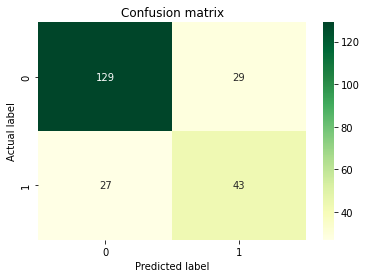

In [ ]:
p = sns.heatmap(pd.DataFrame(c), annot=True, cmap="YlGn" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
from sklearn.metrics import classification_report

#Classification report of the model

print("Classification Report")
print(classification_report(Y_test,Y_pred_LP))

Classification Report
              precision    recall  f1-score   support

           0       0.82      0.83      0.83       158
           1       0.61      0.60      0.60        70

    accuracy                           0.76       228
   macro avg       0.72      0.71      0.72       228
weighted avg       0.76      0.76      0.76       228



## **K-Nearest Neighbor**

####**Running KNN intially by selecting random number for K**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn.fit(X_train,Y_train)

# Make predictions on the test data
Y_pred = knn.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix

#Confusion matrix of the model
pred=knn.predict(X_test)
c=confusion_matrix(Y_test,Y_pred)

Text(0.5, 15.0, 'Predicted label')

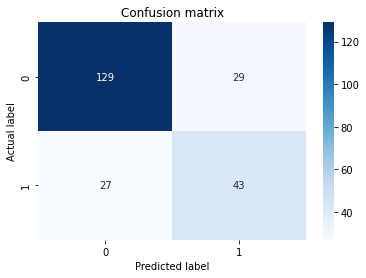

In [ ]:
p = sns.heatmap(pd.DataFrame(c), annot=True, cmap="Blues" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
from sklearn.metrics import classification_report

#Classification report of the model
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.83      0.82      0.82       158
           1       0.60      0.61      0.61        70

    accuracy                           0.75       228
   macro avg       0.71      0.72      0.71       228
weighted avg       0.76      0.75      0.76       228



####**Calculating error rate against each K= 1 to 30**

In [ ]:
import numpy as np

e_r=[]
for i in range(1,30):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,Y_train)
  pred_i = knn.predict(X_test)
  e_r.append(np.mean(pred_i != Y_test))

Text(0, 0.5, 'Error Rate')

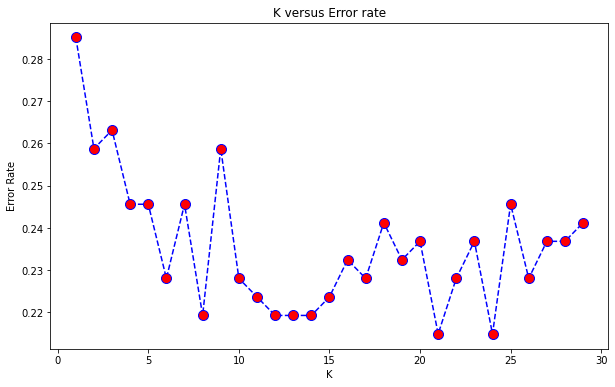

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,30),e_r,color='blue',linestyle='--',markersize=10,markerfacecolor='red',marker='o')
plt.title('K versus Error rate')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

test=[]
train=[]
for i in range(1, 30):
    model =KNeighborsClassifier(i)
    model.fit(X_train,Y_train)

    test.append(model.score(X_train,Y_train))
    train.append(model.score(X_test,Y_test))

In [ ]:
max_train_score = max(train)
train_scores_ind = [i for i, v in enumerate(train) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 78.50877192982456 % and k = [21, 24]


####**Running KNN again after choosing the best K = 21**

In [ ]:
knn_best = KNeighborsClassifier(n_neighbors=21)

knn_best.fit(X_train,Y_train)

Y_pred_2 = knn_best.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix

#Confusion matrix
c1=confusion_matrix(Y_test,Y_pred_2)

Text(0.5, 15.0, 'Predicted label')

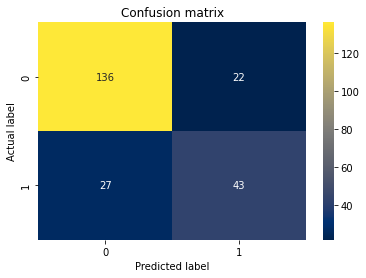

In [ ]:
p = sns.heatmap(pd.DataFrame(c1), annot=True, cmap="cividis" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
from sklearn.metrics import classification_report

#Classification report of the model
print(classification_report(Y_test,Y_pred_2))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85       158
           1       0.66      0.61      0.64        70

    accuracy                           0.79       228
   macro avg       0.75      0.74      0.74       228
weighted avg       0.78      0.79      0.78       228



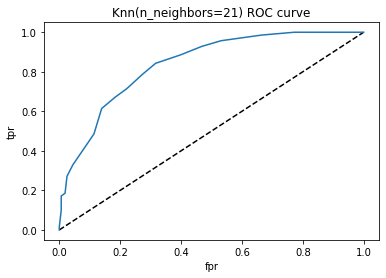

In [ ]:
from sklearn.metrics import roc_curve

#Drawing region of curve for classification
y_pred_proba = knn_best.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=21) ROC curve')
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score

#ROC Score
roc_auc_score(Y_test,y_pred_proba)

0.8386075949367089